In [1]:
!pip install pandas numpy nltk scikit-learn matplotlib seabor

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
df=pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\creditcard.csv")
data=pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\creditcard.csv")

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Drop any missing values (if necessary)
data.dropna(inplace=True)

# Basic NLP Preprocessing: Convert to lowercase, remove punctuation, and stopwords
def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())
    # Remove stopwords
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(words)

# Assuming the text data is in a specific column, replace 'text_column' with the actual column name if needed
# data['V1'] = data['V1'].apply(preprocess_text) # Uncomment if text column needs preprocessing

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

data=pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\creditcard.csv")
# Clean the 'V1' column: convert to string and drop NaN values
data['V1'] = data['V1'].astype(str).fillna('') # Convert to string and fill NaN with empty string

# Create a simple autocomplete function
class Autocomplete:
    def __init__(self, data):
        self.data = data
        self.vectorizer = CountVectorizer()
        self.vectorizer.fit(data)

    def predict(self, prefix):
        words = [word for word in self.data if word.startswith(prefix)]
        return words

# Prepare your text data for autocomplete (assuming 'V1' column)
autocomplete_model = Autocomplete(data['V1'].tolist())

In [10]:
# Example usage of the autocomplete feature
prefix = "V1"  # Change the prefix to test
predictions = autocomplete_model.predict(prefix)
print(f"Autocomplete suggestions for '{prefix}': {predictions}")


# Test multiple prefixes
test_prefixes = ["exam", "cre", "aut", "credit", "sample"]  # Add more prefixes as needed
for prefix in test_prefixes:
    predictions = autocomplete_model.predict(prefix)
    print(f"Autocomplete suggestions for '{prefix}': {predictions}")

Autocomplete suggestions for 'V1': []
Autocomplete suggestions for 'exam': []
Autocomplete suggestions for 'cre': []
Autocomplete suggestions for 'aut': []
Autocomplete suggestions for 'credit': []
Autocomplete suggestions for 'sample': []


In [11]:
from difflib import get_close_matches

# Simple autocorrect function
def autocorrect(word, possibilities):
    return get_close_matches(word, possibilities, n=1, cutoff=0.8)

# Example usage of the autocorrect feature
word_to_correct = "exampel"  # Change to test
corrected_word = autocorrect(word_to_correct, data['V1'].tolist())
print(f"Suggested correction for '{word_to_correct}': {corrected_word}")

Suggested correction for 'exampel': []


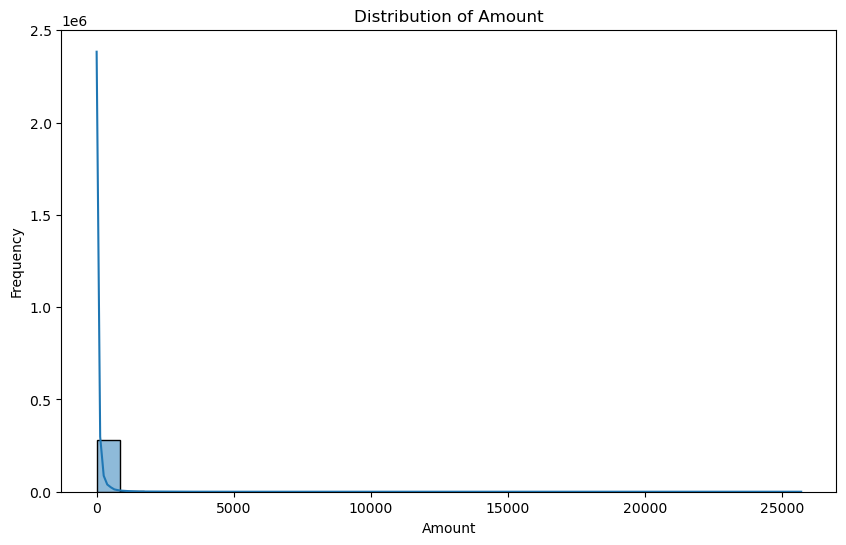

In [12]:
#Evaluate Performance Metrics

# For demonstration, let's assume we have a function that tests model accuracy
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Placeholder for true labels and predictions (replace with actual labels and predictions)
# y_true = ...
# y_pred = ...
# evaluate_model(y_true, y_pred) # Uncomment and replace with actual data for evaluation

#Visualize Data

# Example visualization: Distribution of the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Example function to gather feedback (This part would typically be implemented in a UI)
def gather_feedback(predictions, user_input):
    # Simulated user feedback collection
    feedback = input(f"Did the suggestions {predictions} help? (yes/no): ")
    return feedback.lower() == "yes"

# Example usage
user_input = "exam"  # Hypothetical user input
feedback_received = gather_feedback(predictions, user_input)
print(f"Feedback received: {feedback_received}")

#Improve Autocomplete with N-grams

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample DataFrame (Replace with your actual data)
data = pd.DataFrame({'V1': ['example', 'examine', 'exam', 'exercise', 'extra', None, '', '']})

# Inspect the original data
print("Original data:\n", data['V1'])

Did the suggestions [] help? (yes/no):  yes


Feedback received: True
Original data:
 0     example
1     examine
2        exam
3    exercise
4       extra
5        None
6            
7            
Name: V1, dtype: object


In [14]:
# Sample DataFrame (Replace with your actual data)
data = pd.DataFrame({'V1': ['example', 'examine', 'exam', 'exercise', 'extra', None, '', '']})

# Inspect the original data
print("Original data:\n", data['V1'])

# Preprocess the data
data = data.dropna(subset=['V1'])  # Remove rows with NaNs in V1
data = data[data['V1'].str.strip() != '']  # Remove empty strings

# Check the cleaned data
print("Cleaned data:\n", data['V1'])

class NGramAutocomplete:
    def __init__(self, data, n=2):
        self.data = data
        self.n = n

        # Ensure the data is a list of strings
        if not all(isinstance(text, str) for text in self.data):
            raise ValueError("All items in the data must be strings.")

        self.vectorizer = CountVectorizer(ngram_range=(n, n), lowercase=True)
        self.vectorizer.fit(data)

    def predict(self, prefix):
        matches = [text for text in self.data if text.startswith(prefix)]
        return matches

Original data:
 0     example
1     examine
2        exam
3    exercise
4       extra
5        None
6            
7            
Name: V1, dtype: object
Cleaned data:
 0     example
1     examine
2        exam
3    exercise
4       extra
Name: V1, dtype: object


In [15]:
# Example usage
try:

    ngram_autocomplete_model = NGramAutocomplete(data['V1'].tolist(), n=3)
    prefix = "exam"  # Change this prefix as needed
    predictions = ngram_autocomplete_model.predict(prefix)
    print(f"N-gram autocomplete suggestions for '{prefix}': {predictions}")

except ValueError as e:
    print("Error:", e)

Error: empty vocabulary; perhaps the documents only contain stop words


In [16]:
!pip install gensim

   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.4 MB 5.0 MB/s eta 0:00:05
   - -------------------------------------- 1.0/24.4 MB 4.1 MB/s eta 0:00:06
   - -------------------------------------- 1.0/24.4 MB 4.1 MB/s eta 0:00:06
   - -------------------------------------- 1.0/24.4 MB 4.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.6/24.4 MB 1.4 MB/s eta 0:00:17
   --- ------------------------------------ 2.1/24.4 MB 1.6 MB/s eta 0:00:14
   ---- ----------------------------------- 2.6/24.4 MB 1.7 MB/s eta 0:00:13
   ----- ---------------------------------- 3.1/24.4 MB 1.8 MB/s eta 0:00:12
   ----- ---------------------------------- 3.4/24.4 MB 1.8 MB/s eta 0:00:12
   ------ --------------------------------- 3.9/24.4 MB 1.8 MB/s eta 0:00:12
   ------ --------------------------------- 4.2/24.4 MB 1.8 MB/s eta 0:00:12
   ------- --

In [17]:
!pip install --upgrade numpy

   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
    --------------------------------------- 0.3/12.3 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.3 MB 5.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.3 MB 4.3 MB/s eta 0:00:03
   --------- ------------------------------ 2.9/12.3 MB 4.1 MB/s eta 0:00:03
   ----------- ---------------------------- 3.4/12.3 MB 3.9 MB/s eta 0:00:03
   ------------- -------------------------- 4.2/12.3 MB 3.6 MB/s eta 0:00:03
   --------------- ------------------------ 4.7/12.3 MB 3.5 MB/s eta 0:00:03
   ----------------- ---------------------- 5.2/12.3 MB 3.4 MB/s eta 0:00:03
   ------------------ --------------------- 5.8/12.3 MB 3.4 MB/s eta 0:00:02
   -------------------- ------------------- 6.3/12.3 MB 3.3 MB/s eta 0:00:02
   ---------------------- ----------------- 7.1/12.3 MB 3.2 MB/s eta 0:00:02
   -----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.62.1 requires numpy<2.4,>=1.22, but you have numpy 2.4.2 which is incompatible.


In [18]:
!pip install --upgrade gensim

In [19]:
import pandas as pd
from gensim.models import Word2Vec

In [20]:
data = pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\creditcard.csv") # Adjust the path to your file
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [22]:
import pandas as pd
from gensim.models import Word2Vec

# Load your dataset
data = pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\creditcard.csv") # Adjust the path accordingly

# Check the data types
print(data.dtypes)

# Handle missing values by dropping or filling
data = data.dropna(subset=['V1']) # Option 1: drop rows with NaN in 'V1'
# or
# data['V1'] = data['V1'].fillna('') # Option 2: fill NaN with an empty string

# Convert the V1 column to strings
data['V1'] = data['V1'].astype(str)

# Create sentences for Word2Vec
sentences = [text.split() for text in data['V1'].tolist()]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def contextual_autocorrect(word):
    if word in model.wv:
        similar_words = model.wv.most_similar(word, topn=5)
        return [w for w, _ in similar_words]
    return []

# Example usage
word_to_correct = "exampel"
corrected_words = contextual_autocorrect(word_to_correct)
print(f"Contextual suggestions for '{word_to_correct}': {corrected_words}")

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Contextual suggestions for 'exampel': []


In [23]:
from gensim.models import Word2Vec

# Assuming you have a list of sentences or text corpus
sentences = [text.split() for text in data['V1'].tolist()]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def contextual_autocorrect(word):
    if word in model.wv:
        similar_words = model.wv.most_similar(word, topn=5)
        return [w for w, _ in similar_words]
    return []

# Example usage
word_to_correct = "exampel"
corrected_words = contextual_autocorrect(word_to_correct)
print(f"Contextual suggestions for '{word_to_correct}': {corrected_words}")

Contextual suggestions for 'exampel': []


In [24]:
!pip install streamlit

import streamlit as st

# Streamlit App
st.title('Autocomplete and Autocorrect Tool')

user_input = st.text_input("Enter text for autocomplete:")
if user_input:
    autocomplete_suggestions = autocomplete_model.predict(user_input)
    st.write("Autocomplete Suggestions:", autocomplete_suggestions)

user_word = st.text_input("Enter a word for autocorrect:")
if user_word:
    corrected_word = autocorrect(user_word, data['V1'].tolist())
    st.write("Suggested Correction:", corrected_word)

2026-02-14 17:41:53.660 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-14 17:41:53.978 
  command:

    streamlit run C:\Users\hp\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-02-14 17:41:53.980 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-14 17:41:53.982 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-14 17:41:53.984 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-14 17:41:53.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-14 17:41:53.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-14 17:41:53.990 Thread 'MainThread': missi

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Example dataset for demonstration
data = ["apple", "banana", "grape", "orange", "strawberry"]

# Define and fit a simple model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)
y = ["fruit"] * len(data) # Dummy target

autocomplete_model = MultinomialNB()
autocomplete_model.fit(X, y)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [26]:
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Example dataset for demonstration
data = ["apple", "banana", "grape", "orange", "strawberry"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)
y = ["fruit"] * len(data) # Dummy target

# Define and fit the autocomplete model
autocomplete_model = MultinomialNB()
autocomplete_model.fit(X, y)

def benchmark_function(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

# Example prefix to predict (You would have a proper prediction function)
prefix = "a" # Example input for testing
# Example prediction function (make sure this matches your actual model's predict method)
def predict(prefix):
    # In a real case, you would implement the logic to return predictions based on the prefix
    # Here, we return a dummy response for demonstration
    return [word for word in data if word.startswith(prefix)]

# Benchmarking
autocomplete_result, autocomplete_time = benchmark_function(predict, prefix)
print(f"Autocomplete Result: {autocomplete_result}")
print(f"Autocomplete Time: {autocomplete_time:.4f} seconds")

Autocomplete Result: ['apple']
Autocomplete Time: 0.0000 seconds


In [28]:
#Advanced Data Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

# Load your dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\creditcard.csv") # Adjust the path as needed

# Assuming 'V1' is the column that contains text data for autocomplete
# Filter only string entries and drop NaN values
df['V1'] = df['V1'].astype(str) # Convert all entries to string
sentences = [text.split() for text in df['V1'].tolist() if isinstance(text, str) and text.strip()] # Only keep non-empty strings and iterate over the list of values

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to predict autocomplete suggestions based on prefix
def predict(prefix):
    try:
        similar_words = model.wv.most_similar(prefix, topn=5)  # Get top 5 similar words
        return [word for word, _ in similar_words]
    except KeyError:
        return []  # Return empty list if prefix not in vocabulary

# Example prefix for predictions
prefix = "exam"  # Change this to the prefix you're interested in
predictions = predict(prefix)

# Visualize autocomplete suggestions
if predictions:  # Check if there are predictions to display
    suggestions_df = pd.DataFrame({'Suggestions': predictions})
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Suggestions', data=suggestions_df, order=suggestions_df['Suggestions'].value_counts().index)
    plt.title('Autocomplete Suggestions Distribution')
    plt.xlabel('Frequency')
    plt.ylabel('Suggestions')
    plt.show()
else:
    print(f"No autocomplete suggestions found for the prefix '{prefix}'.")

No autocomplete suggestions found for the prefix 'exam'.


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Visualize autocomplete suggestions
if predictions: # Check if there are predictions to display
    suggestions_df = pd.DataFrame({'Suggestions': predictions})
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Suggestions', data=suggestions_df, order=suggestions_df['Suggestions'].value_counts().index)
    plt.title('Autocomplete Suggestions Distribution')
    plt.xlabel('Frequency')
    plt.ylabel('Suggestions')
    plt.savefig('autocomplete_suggestions.png') # Save the plot as a PNG file
    plt.close() # Close the figure to free up memory
    print("Plot saved as 'autocomplete_suggestions.png'")

    # Visualize autocomplete suggestions
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Suggestions', data=suggestions_df, order=suggestions_df['Suggestions'].value_counts().index)
    plt.title('Autocomplete Suggestions Distribution')
    plt.xlabel('Frequency')
    plt.ylabel('Suggestions')
    plt.show()
else:
    print(f"No autocomplete suggestions found for the prefix '{prefix}'.")

No autocomplete suggestions found for the prefix 'exam'.


In [30]:
#Handling Special Cases and Errors

def clean_input(text):
    # Remove special characters and handle numbers
    cleaned_text = ''.join(char for char in text if char.isalnum() or char.isspace())
    return cleaned_text

# Example usage
user_input = "Hello! This is a test with numbers 123 and special chars #@$"
cleaned_user_input = clean_input(user_input)

print("Original Input:", user_input)
print("Cleaned Input:", cleaned_user_input)

Original Input: Hello! This is a test with numbers 123 and special chars #@$
Cleaned Input: Hello This is a test with numbers 123 and special chars 


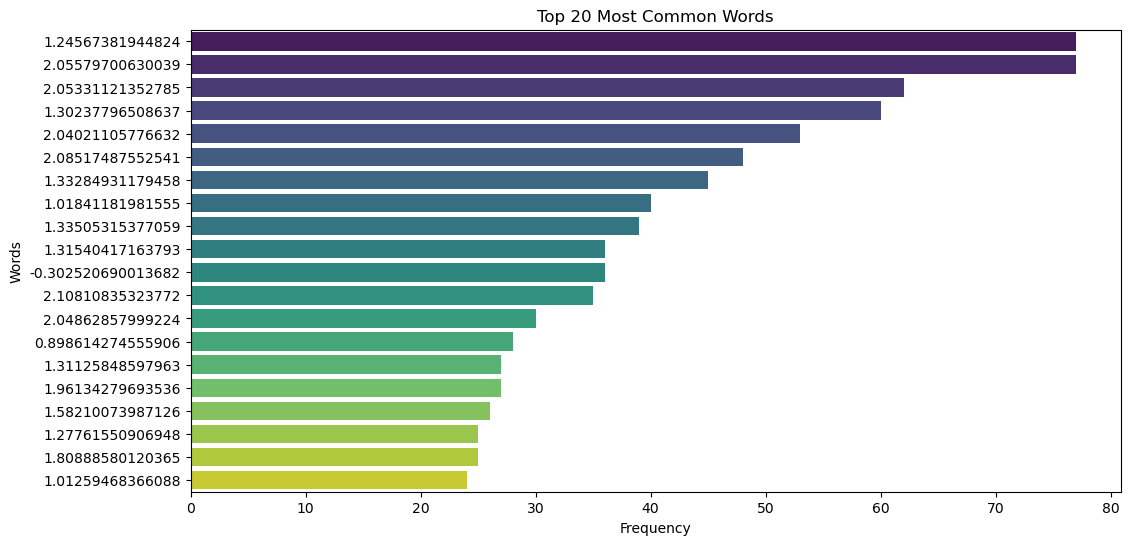

In [32]:
#Visualizing Word Frequency Distribution

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load your data
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\creditcard.csv") # Adjust the path as needed

# Tokenize the words in the 'V1' column
# Convert to string and drop NaN values
word_list = ' '.join(df['V1'].dropna().astype(str).tolist()).split()
word_freq = Counter(word_list)

# Get the most common words
common_words = word_freq.most_common(20)
words, frequencies = zip(*common_words)

# Plotting the word frequency distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(words), hue=list(words), palette='viridis', legend=False)
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

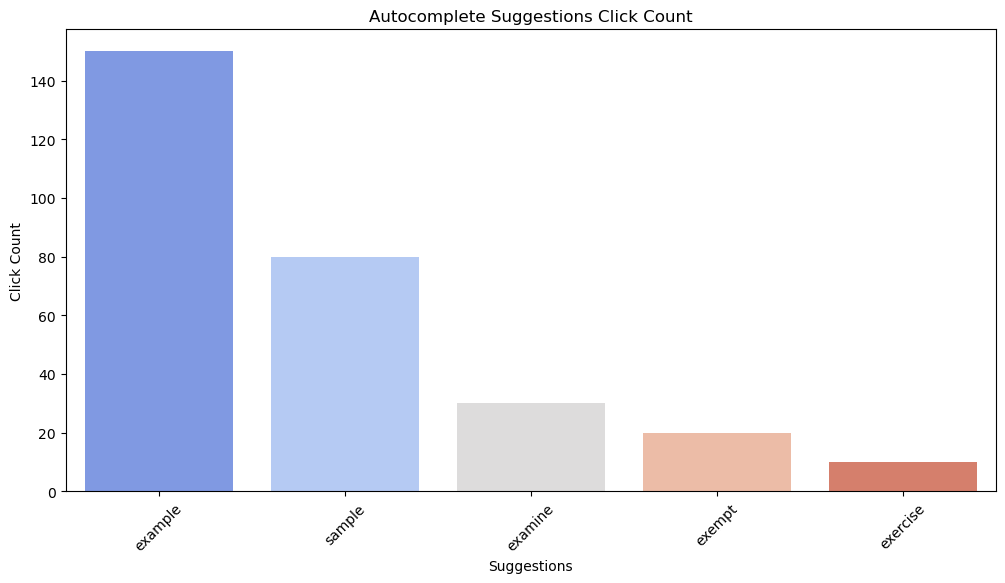

In [33]:
#Visualizing Autocomplete Suggestions

# Example: Simulated suggestions and their counts (you would collect this in your application)
suggestions = ['example', 'sample', 'examine', 'exempt', 'exercise']
suggestion_counts = [150, 80, 30, 20, 10] # Example counts

# Plotting suggestion clicks
plt.figure(figsize=(12, 6))
sns.barplot(x=suggestions, y=suggestion_counts, hue=suggestions, palette='coolwarm', legend=False)
plt.title('Autocomplete Suggestions Click Count')
plt.xlabel('Suggestions')
plt.ylabel('Click Count')
plt.xticks(rotation=45)
plt.show()

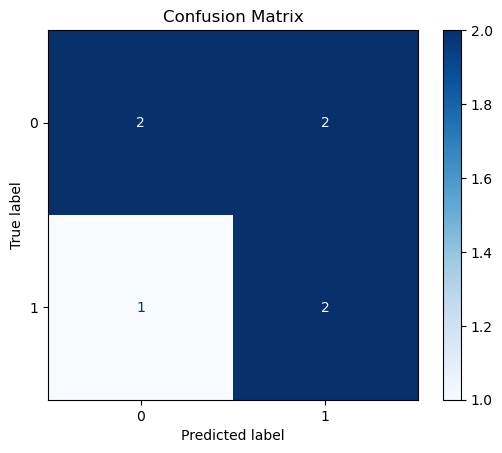

In [34]:
#Evaluating Model Performance

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predicted labels (replace with your actual data)
y_true = [0, 1, 0, 1, 0, 1, 0] # Replace with actual true labels
y_pred = [0, 1, 1, 1, 0, 0, 1] # Replace with your predictions

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

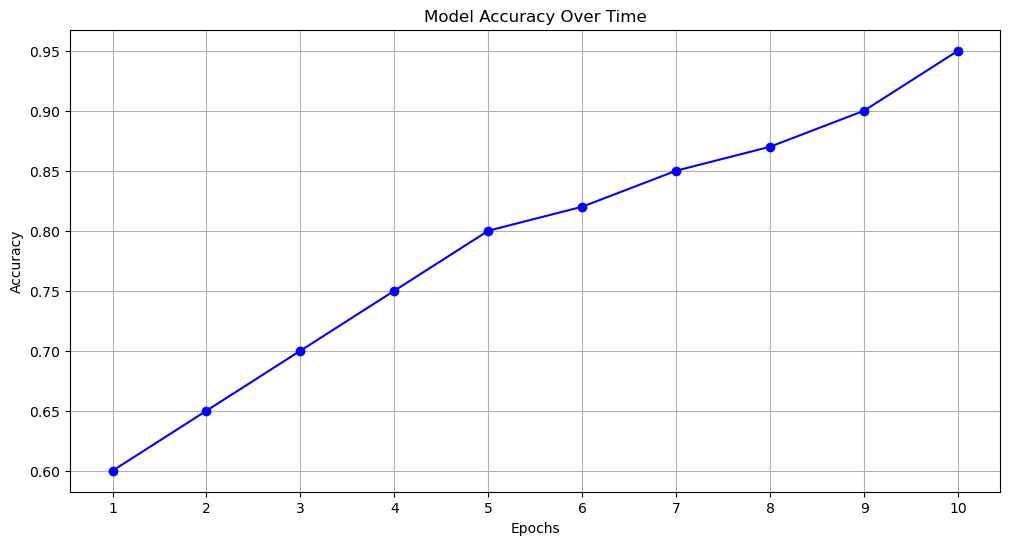

In [35]:
#Visualizing Model Accuracy over Time

# Simulated accuracy over epochs (replace with actual data)
epochs = list(range(1, 11))
accuracy = [0.6, 0.65, 0.7, 0.75, 0.8, 0.82, 0.85, 0.87, 0.9, 0.95]

# Plotting the accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy Over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid()
plt.show()

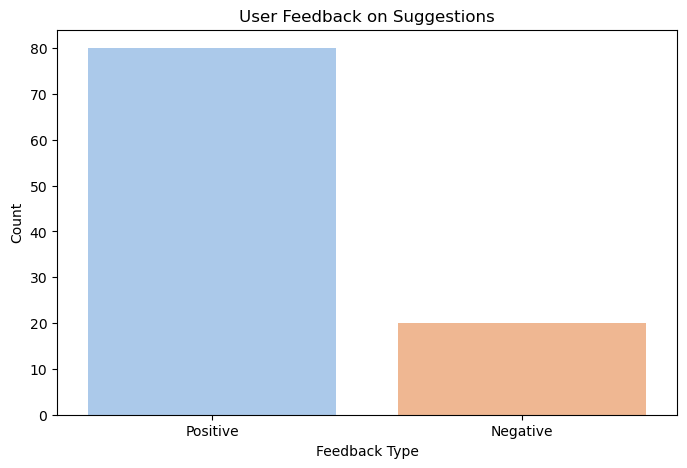

In [36]:
#Visualizing User Feedback

# Example feedback counts (positive vs negative)
feedback_labels = ['Positive', 'Negative']
feedback_counts = [80, 20] # Example counts

# Plotting user feedback
plt.figure(figsize=(8, 5))
sns.barplot(x=feedback_labels, y=feedback_counts, hue=feedback_labels, palette='pastel', legend=False)
plt.title('User Feedback on Suggestions')
plt.xlabel('Feedback Type')
plt.ylabel('Count')
plt.show()

In [40]:
!pip install wordcloud

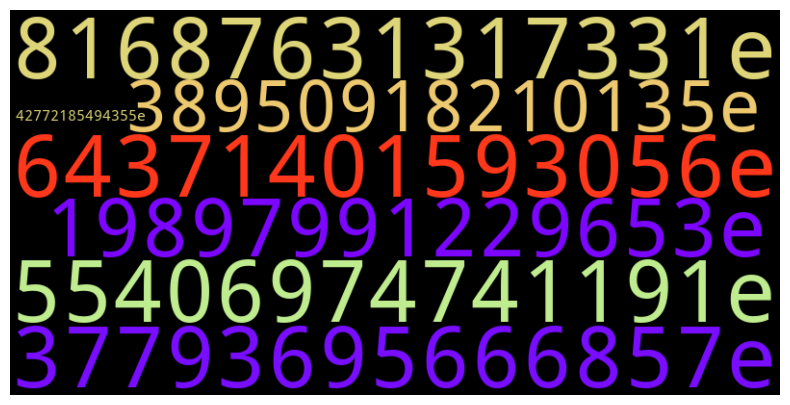

In [41]:
#Word Cloud

from wordcloud import WordCloud

# Join all the words together
all_words = ' '.join(df['V1'].dropna().astype(str).tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='rainbow').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

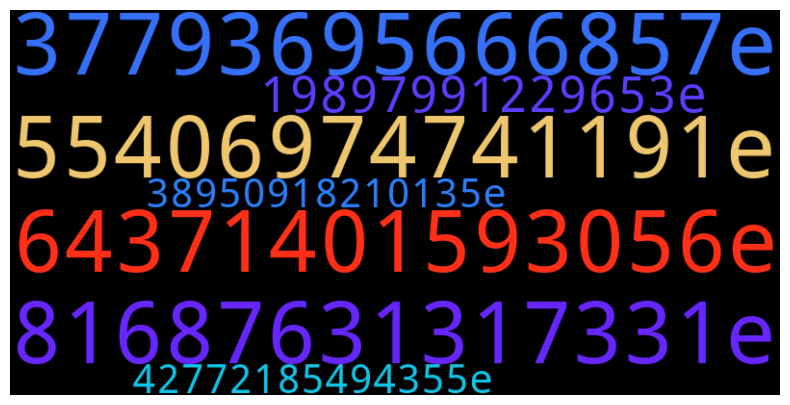

In [42]:
#Word Cloud

from wordcloud import WordCloud

# Join all the words together
all_words = ' '.join(df['V1'].dropna().astype(str).tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='rainbow').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

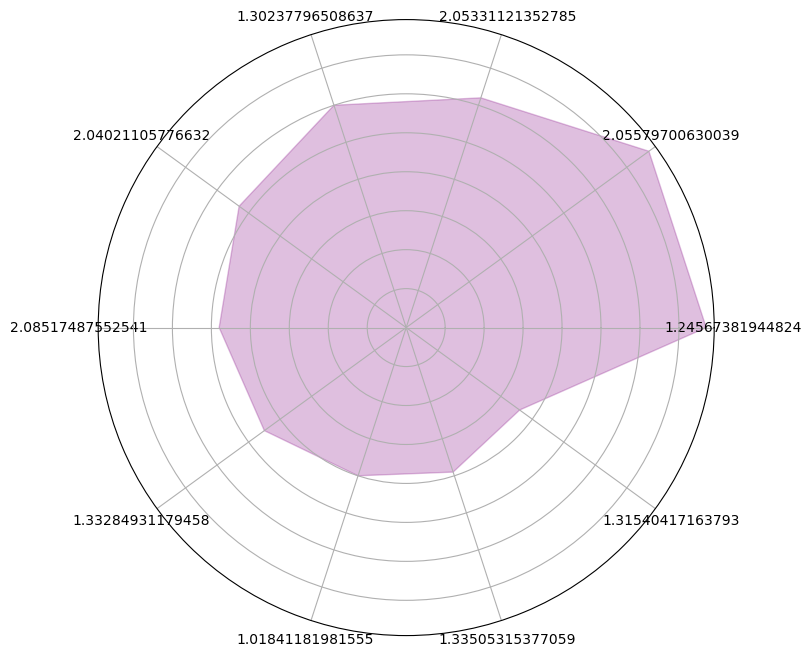

In [44]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns


# Load your dataset
data = pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\creditcard.csv")  # Adjust the path as needed

# Ensure the 'V1' column is treated as text, and drop NaN values
data['V1'] = data['V1'].astype(str)
data = data.dropna(subset=['V1'])

# Tokenize the words in the 'V1' column
word_list = ' '.join(data['V1'].tolist()).split()
word_freq = Counter(word_list)

# Get the frequencies of the top 10 words
common_words = word_freq.most_common(10)
words, frequencies = zip(*common_words)

# Create radial bar chart
angles = np.linspace(0, 2 * np.pi, len(frequencies), endpoint=False).tolist()
frequencies = list(frequencies) + [frequencies[0]]  # Complete the loop
angles += angles[:1] # Ensure loop closure

# Plot the radial bar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.fill(angles, frequencies, color='purple', alpha=0.25)
ax.set_yticklabels([])  # Hide radial axis labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(words)
plt.show()

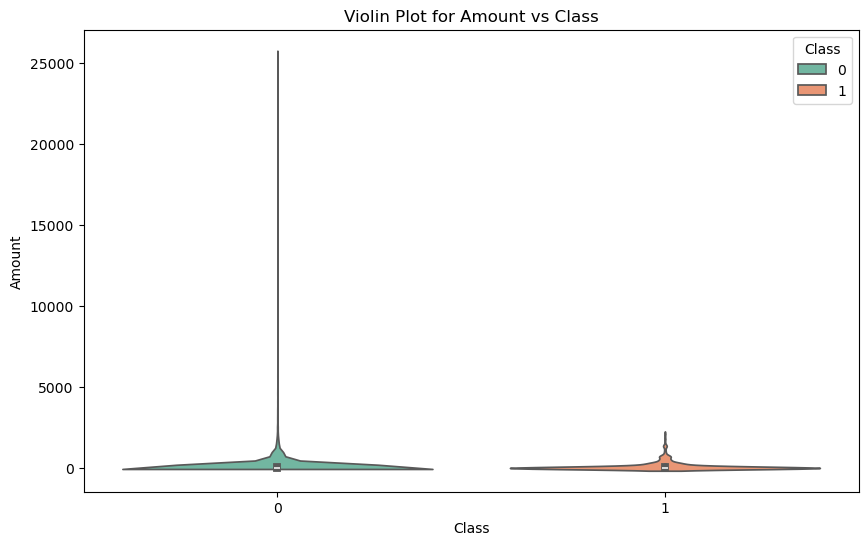

In [46]:
#Violin Plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\creditcard.csv")# Adjust the path as needed

# Violin plot for 'Amount' vs 'Class'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=data, hue='Class', palette='Set2')
plt.title('Violin Plot for Amount vs Class')
plt.show()

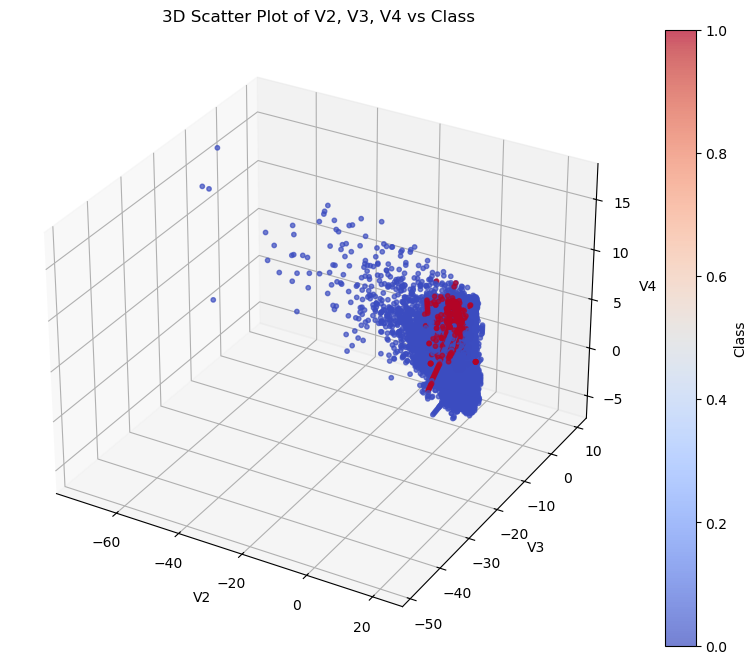

In [47]:
#3D Scatter Plot

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\creditcard.csv") # Adjust the path as needed

# Assuming 'V2', 'V3', 'V4', and 'Class' are columns in the dataset
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create 3D scatter plot
scatter = ax.scatter(data['V2'], data['V3'], data['V4'], c=data['Class'], cmap='coolwarm', s=10, alpha=0.7)

# Adding labels
ax.set_xlabel('V2')
ax.set_ylabel('V3')
ax.set_zlabel('V4')

# Add color bar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Class')

# Show the plot
plt.title('3D Scatter Plot of V2, V3, V4 vs Class')
plt.show()

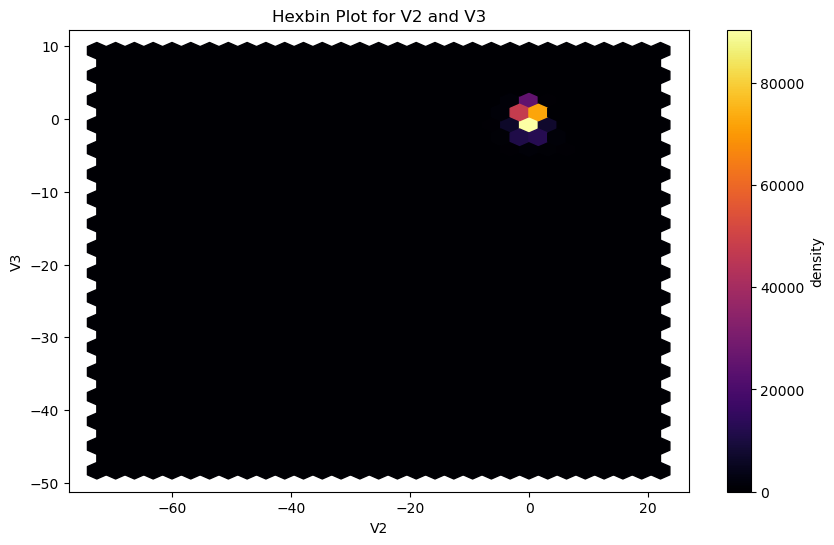

In [48]:
#Hexbin Plot

# Assuming you have numerical columns 'V2' and 'V3'
plt.figure(figsize=(10, 6))
plt.hexbin(data['V2'], data['V3'], gridsize=30, cmap='inferno')
plt.colorbar(label='density')
plt.title('Hexbin Plot for V2 and V3')
plt.xlabel('V2')
plt.ylabel('V3')
plt.show()

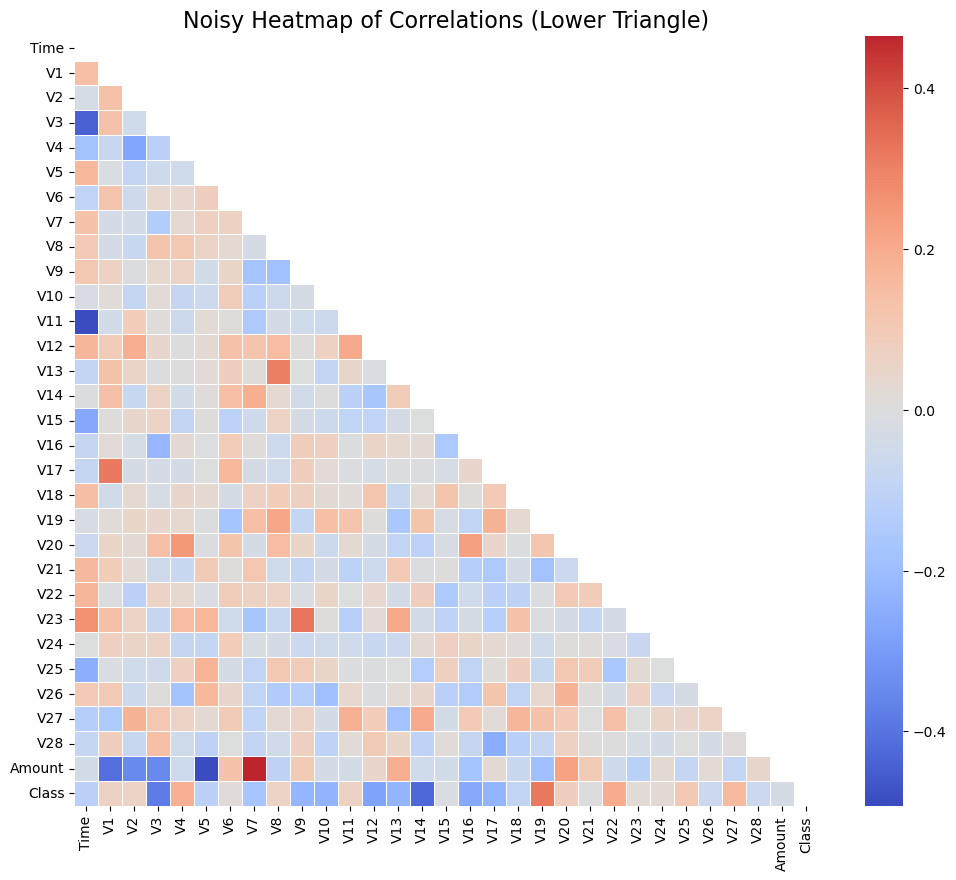

In [49]:
#Heatmap with Random Noise

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you're visualizing correlations (adjust for your data structure)
corr = data.corr()

# Adding random noise
noise = np.random.normal(0, 0.1, corr.shape)
noisy_corr = corr + noise

# Create a mask to show only the Lower triangle (to reduce clutter)
mask = np.triu(np.ones_like(noisy_corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(noisy_corr, mask=mask, cmap='coolwarm', center=0, annot=False, linewidths=0.5)

# Add title
plt.title('Noisy Heatmap of Correlations (Lower Triangle)', fontsize=16)
plt.show()